# 1. Importação de Bibliotecas e Dados

In [71]:
# Todas bibliotecas utilizadas no projeto são importadas no começo

# manipulação e processamento de dados
import pandas as pd
import numpy as np

# Visualização de dados e imagens
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Pipeline e algorítmos de machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer

# Ajuste fino e avaliação do modelo
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# Esconder avisos de sistema
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

%matplotlib inline

In [72]:
# leitura dos csv baixados
train = pd.read_csv('./data/database_fires.csv')
test = pd.read_csv('./data/respostas.csv')

#### Descrição dos Arquivos

- **database_fires.csv** - Nossa base de treino
- **resposta.csv** - Arquivo para a avaliar o modelo com dados não vistos anteriormente e gerar o arquivo de submissão das respostas

# 2. Junção das bases de dados

In [73]:
#train = train.dropna()

# Junção de todos os dados em um arquivo
ntrain = train.shape[0]
ntest = test.shape[0]

# Criação da variável y_train; será utilizada na modelagem
y_train = train['fires'].values

# Salvando o ID do incêndio pronto para o envio do arquivo no final
fireId = test['id']

# Criação do dataset concatenado
data = pd.concat((train, test))

# Print do shape do dataset
print("O tamanho dos dados é: {}".format(data.shape))

O tamanho dos dados é: (296109, 14)


# 3. Inspeção Inicial

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296109 entries, 0 to 44341
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                296109 non-null  int64  
 1   estado            296109 non-null  object 
 2   estacao           296109 non-null  int64  
 3   data              296109 non-null  object 
 4   precipitacao      294354 non-null  float64
 5   temp_max          263789 non-null  float64
 6   temp_min          282145 non-null  float64
 7   insolacao         246499 non-null  float64
 8   evaporacao_piche  199124 non-null  float64
 9   temp_comp_med     245931 non-null  float64
 10  umidade_rel_med   255832 non-null  float64
 11  vel_vento_med     243664 non-null  float64
 12  altitude          296109 non-null  float64
 13  fires             251767 non-null  float64
dtypes: float64(10), int64(2), object(2)
memory usage: 33.9+ MB


#### Descrição dos Campos

- **id**- id único para cada registro
- **estado** - estado cujos dados foram extraídos
- **estacao** - indicador aleatório e único para cada região de aquisição dos dados
- **data** - data de observação dos dados
- **precipitacao** - dados de precipitação [mm]
- **temp_max** - dados de temperatura máxima observada no dia [°C]
- **temp_min** - dados de temperatura mínima observada no dia [°C]
- **insolacao** - período de tempo em que houve irradiação solar sobre superfície [horas]
- **evaporacao_piche** - medida de evaporação [mm]
- **temp_comp_med** - temperatura compensada média [°C]
- **umidade_rel_med** - umidade relativa média [%]
- **vel_vento_med** - velocidade média do vento [m/s]
- **altitude** - altitude do local de medição [m]
- **fires** - variável booleana que indica se houve incêndio no dia ou não

In [75]:
# Inspecionando as 5 primeiras linhas
data.head()

,id,estado,estacao,data,precipitacao,temp_max,temp_min,insolacao,evaporacao_piche,temp_comp_med,umidade_rel_med,vel_vento_med,altitude,fires
0,1,AC,50484,01/01/2016,NaN,31.4,NaN,2.3,NaN,NaN,96.0,0.00000,170.0,0.0
1,2,AC,50484,02/01/2016,0.0,32.5,23.3,4.4,NaN,26.44,95.0,0.51444,170.0,0.0
2,3,AC,50484,03/01/2016,35.2,30.5,24.0,0.6,NaN,25.78,97.0,0.51444,170.0,0.0
3,4,AC,50484,04/01/2016,60.2,31.7,22.3,2.0,NaN,25.94,96.0,0.00000,170.0,0.0
4,5,AC,50484,05/01/2016,28.4,28.5,23.0,0.1,NaN,25.04,95.0,0.00000,170.0,0.0


In [76]:
# Estatísticas descritivas do dataset
data.describe()

,id,estacao,precipitacao,temp_max,temp_min,insolacao,evaporacao_piche,temp_comp_med,umidade_rel_med,vel_vento_med,altitude,fires
count,296109.000000,296109.000000,294354.000000,263789.000000,282145.000000,246499.000000,199124.000000,245931.000000,255832.000000,243664.000000,296109.000000,251767.000000
mean,148055.000000,55137.881010,3.802912,30.872810,19.856248,6.781701,4.533419,24.662601,72.857076,1.728413,386.328757,0.252201
std,85479.449767,25548.634349,10.730024,4.522093,4.262457,3.397632,3.387488,4.092109,14.349557,1.325386,330.981325,0.434277
min,1.000000,10056.000000,0.000000,2.400000,-7.000000,0.000000,0.000000,-2.840000,4.000000,0.000000,1.840000,0.000000
25%,74028.000000,33121.000000,0.000000,28.700000,17.700000,4.300000,2.100000,22.680000,63.750000,0.685920,79.500000,0.000000
50%,148055.000000,55571.000000,0.000000,31.600000,20.800000,7.700000,3.600000,25.660000,75.250000,1.400000,286.300000,0.000000
75%,222082.000000,76275.000000,1.400000,33.900000,23.000000,9.600000,6.000000,27.460000,83.750000,2.450000,648.000000,1.000000
max,296109.000000,99809.000000,234.400000,43.900000,30.800000,14.900000,28.800000,35.040000,100.000000,15.433200,1642.000000,1.000000


,Total,Porcentagem,Total_train,Porcentagem_train,Total_test,Porcentagem_test
evaporacao_piche,96985.0,0.327531,73571,0.292219,23414.0,0.528032
vel_vento_med,52445.0,0.177114,43310,0.172024,9135.0,0.206012
temp_comp_med,50178.0,0.169458,41838,0.166177,8340.0,0.188084
insolacao,49610.0,0.167540,40549,0.161058,9061.0,0.204344
umidade_rel_med,40277.0,0.136021,32823,0.130371,7454.0,0.168102
temp_max,32320.0,0.109149,26894,0.106821,5426.0,0.122367
temp_min,13964.0,0.047158,11588,0.046027,2376.0,0.053584
precipitacao,1755.0,0.005927,1407,0.005589,348.0,0.007848


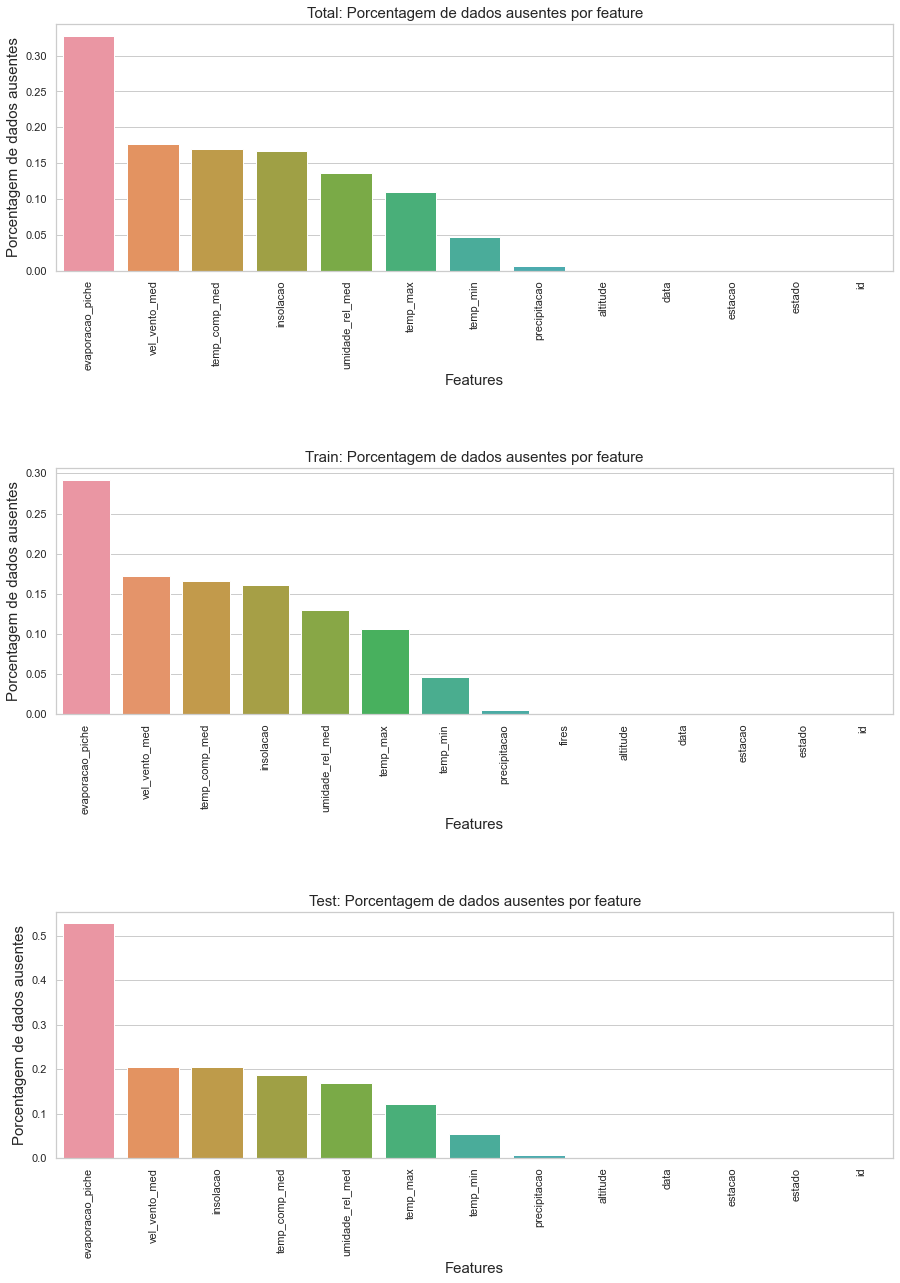

In [77]:
# Quantidade de NaN para cada feature do dataset

# Total
temp = data.drop(columns=['fires'])
total = temp.isnull().sum().sort_values(ascending=False)
porcentagem = (temp.isnull().sum()/temp.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, porcentagem], axis=1, keys=['Total', 'Porcentagem'])
missing_data1= missing_data
# Gráfico
fig = plt.figure(figsize = (15,10))
ax1 = plt.subplot(3,1,1)
ax1 = sns.barplot(x=missing_data.index, y=missing_data['Porcentagem'])
ax1.tick_params(axis='x', rotation=90)
ax1.set_xlabel('Features', fontsize=15)
ax1.set_ylabel('Porcentagem de dados ausentes', fontsize=15)
ax1.set_title('Total: Porcentagem de dados ausentes por feature', fontsize=15)

# Train
total = train.isnull().sum().sort_values(ascending=False)
porcentagem = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, porcentagem], axis=1, keys=['Total_train', 'Porcentagem_train'])
missing_data2 = missing_data
# Gráfico
ax2 = plt.subplot(3,1,2)
ax2 = sns.barplot(x=missing_data.index, y=missing_data['Porcentagem_train'])
ax2.tick_params(axis='x', rotation=90)
ax2.set_xlabel('Features', fontsize=15)
ax2.set_ylabel('Porcentagem de dados ausentes', fontsize=15)
ax2.set_title('Train: Porcentagem de dados ausentes por feature', fontsize=15)

# Test
total = test.isnull().sum().sort_values(ascending=False)
porcentagem = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, porcentagem], axis=1, keys=['Total_test', 'Porcentagem_test'])
missing_data3 = missing_data
# Gráfico
ax3 = plt.subplot(3,1,3)
ax3 = sns.barplot(x=missing_data.index, y=missing_data['Porcentagem_test'])
ax3.tick_params(axis='x', rotation=90)
ax3.set_xlabel('Features', fontsize=15)
ax3.set_ylabel('Porcentagem de dados ausentes', fontsize=15)
ax3.set_title('Test: Porcentagem de dados ausentes por feature', fontsize=15)

# Ajuste dos gráficos
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.7, wspace=None, hspace=0.8)

# Exibição do dataframe
missing = pd.concat([missing_data1, missing_data2, missing_data3], axis=1)
missing = missing.drop('fires').sort_values(by=['Porcentagem'], ascending= False)
missing[missing['Porcentagem'] != 0]

# 4. Análise Exploratória de Dados

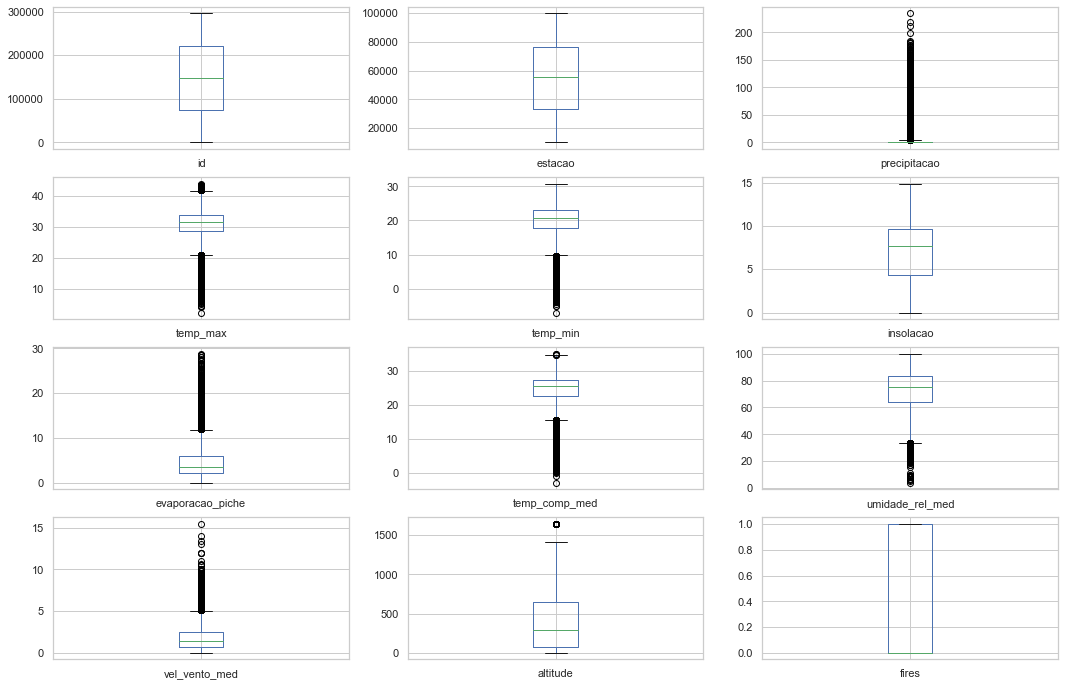

In [78]:
# Boxplot para visualização de outliers
data.plot(kind='box', figsize=(18,12),subplots=True, layout=(4, 3));

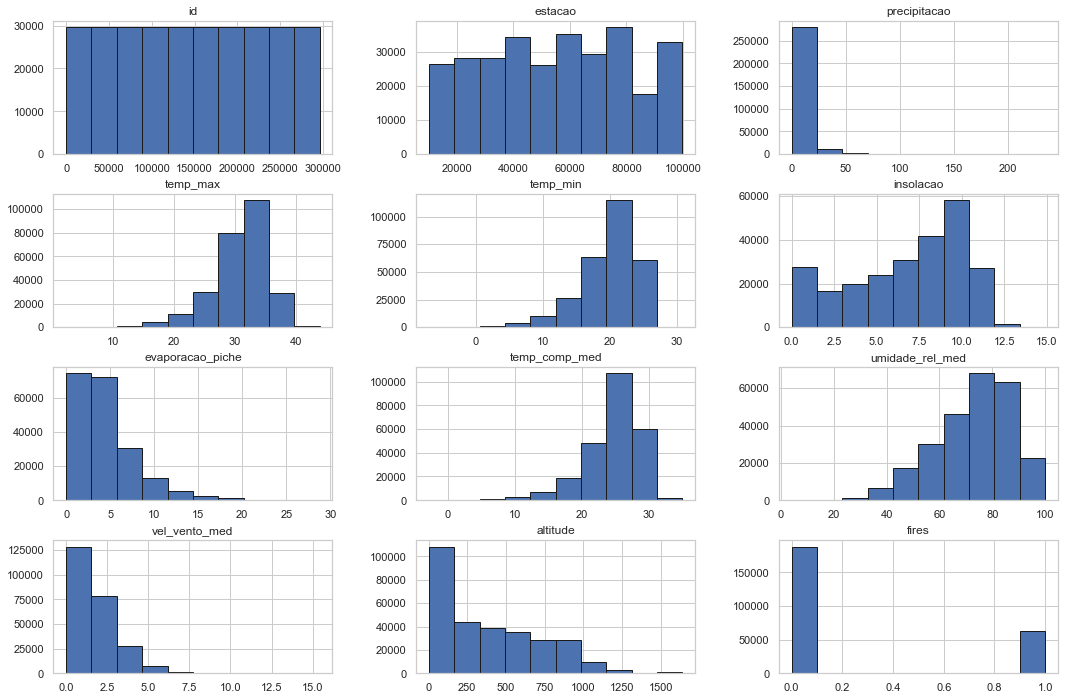

In [79]:
# Histograma dos dados
data.hist(figsize=(18,12), layout = (4,3), ec='k');

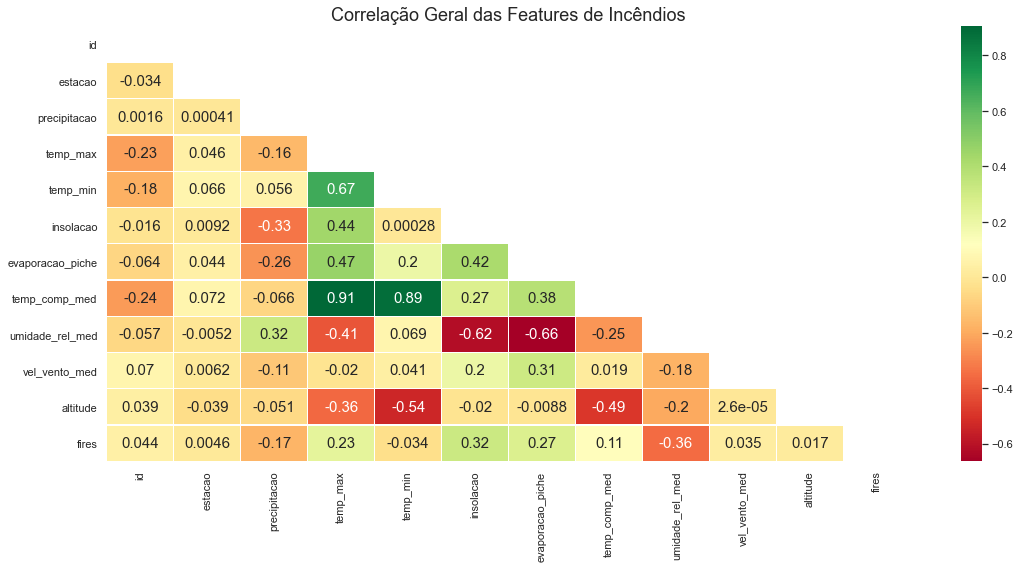

In [80]:
# Início da Matriz de correlação
corr = train.corr()
# Máscara
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Imagem
plt.figure(figsize=(18, 8))
# Título
plt.title('Correlação Geral das Features de Incêndios', fontsize=18)
# Matriz de correlação
_ = sns.heatmap(corr, mask=mask, annot=True,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':15})

#### Fires

0    188271
1     63496
Name: fires, dtype: int64


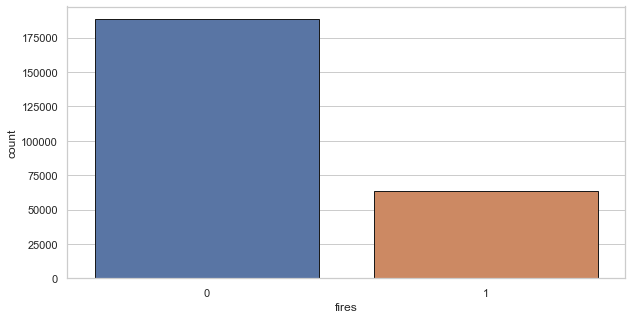

In [81]:
# Plot de fires
fig = plt.figure(figsize = (10,5))
sns.countplot(x='fires', data = train, ec = 'k')
print(train['fires'].value_counts())

#### Estado

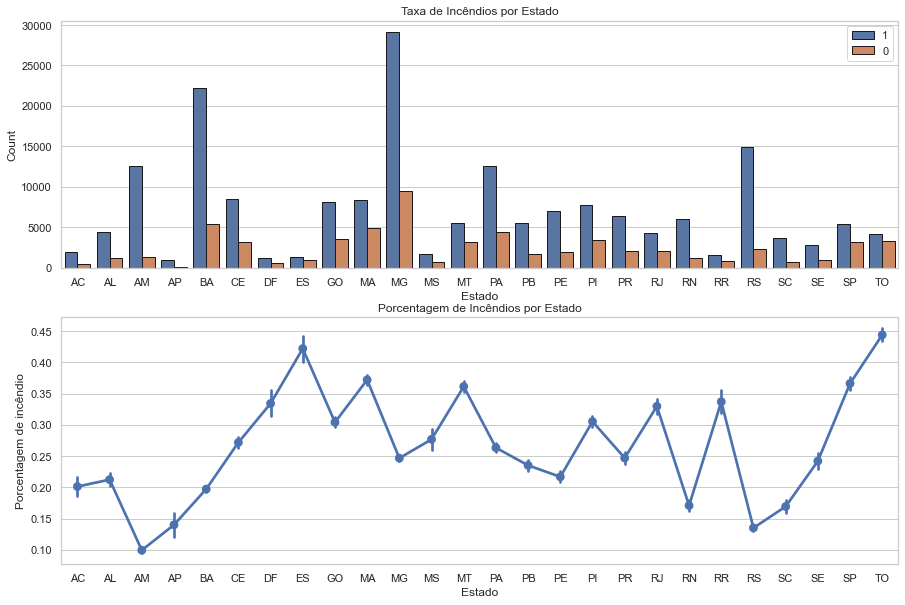

In [82]:
fig = plt.figure(figsize = (15,10))
ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = 'estado', hue = 'fires', data = train, ec = 'k')
ax1.set_title('Taxa de Incêndios por Estado')
ax1.set_xticklabels(train['estado'].unique())
ax1.set_xlabel('Estado')
ax1.set_ylabel('Count')
ax1.legend([1, 0])

# Pointplot Pclass type
ax2 = plt.subplot(2,1,2)
sns.pointplot(x='estado', y='fires', data=train)
ax2.set_xlabel('Estado')
ax2.set_ylabel('Porcentagem de incêndio')
_ = ax2.set_title('Porcentagem de Incêndios por Estado')

#### Estação

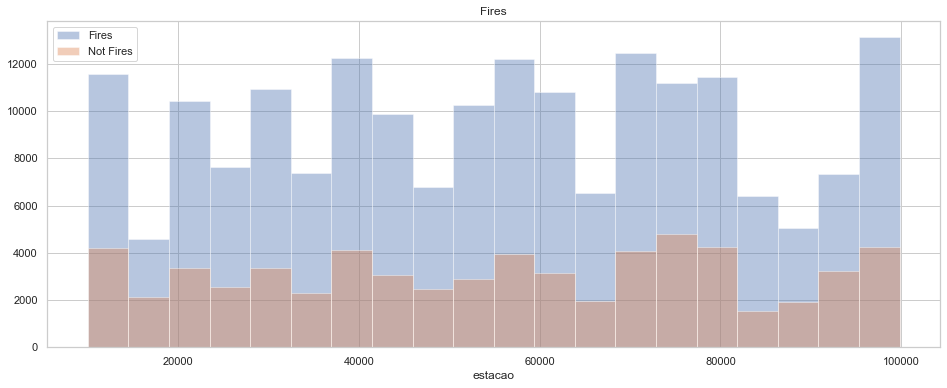

In [83]:
# Histograma de estações em função de incêndios
fig = plt.figure(figsize=(16, 6))
ax = sns.distplot(train[train['fires']==0].estacao, bins=20, label = 'Fires', kde =False)
ax = sns.distplot(train[train['fires']==1].estacao, bins=20, label = 'Not Fires', kde =False)
ax.legend()
_ = ax.set_title('Fires')
plt.show()

#### Data

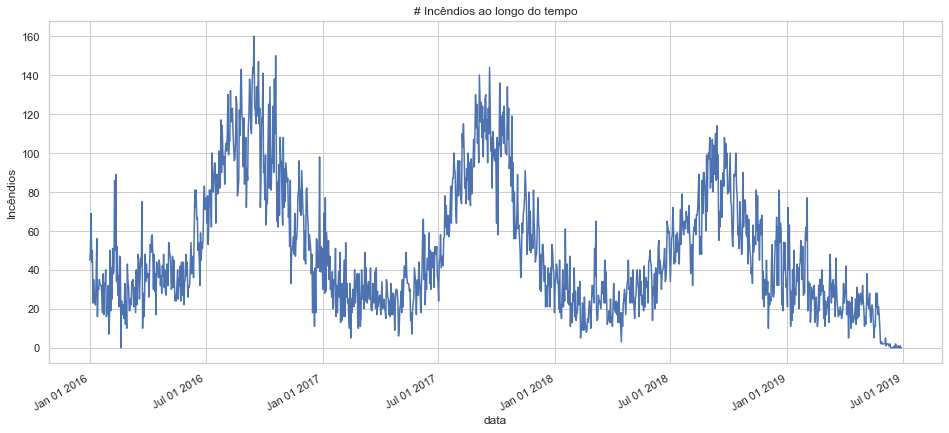

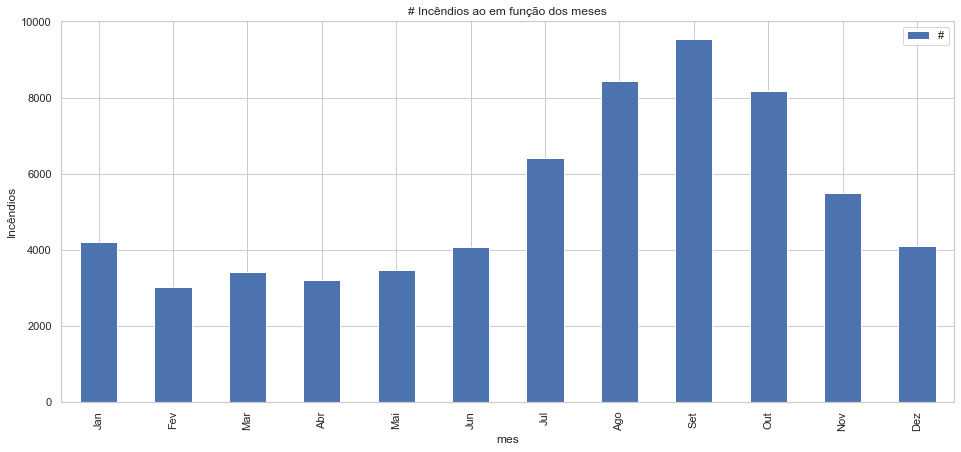

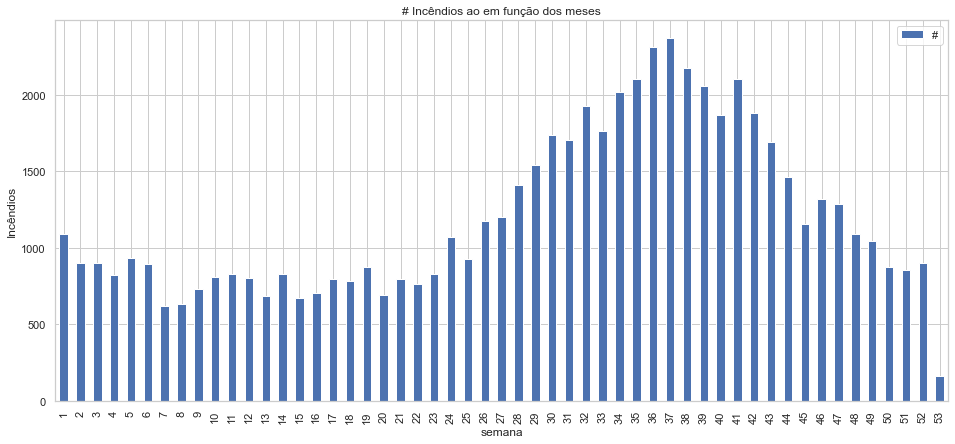

In [84]:
# Agrupando a soma de incêndios por data
datas = train.groupby(['data']).sum()
datas = datas[['fires']]
datas.index = pd.to_datetime(datas.index, format='%d/%m/%Y')
datas['ano'] = datas.index.year
datas['mes'] = datas.index.month
datas['semana'] = datas.index.week
# datas['semana'] = datas['semana'].replace(53, 1)
fig, ax = plt.subplots(figsize=(16,7))
datas.fires.plot(ax=ax)
ax.set(title='# Incêndios ao longo do tempo', ylabel= 'Incêndios')
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))

# Mensal
fig, ax = plt.subplots(figsize=(16,7))
datas.groupby(['mes']).sum()[['fires']].plot(kind='bar', ax=ax)
ax.legend(labels='#')
_ = ax.set(title='# Incêndios ao em função dos meses', ylabel= 'Incêndios', label='# Incêndios', xticklabels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Semanal
fig, ax = plt.subplots(figsize=(16,7))
datas.groupby(['semana']).sum()[['fires']].plot(kind='bar', ax=ax)
ax.legend(labels='#')
_ = ax.set(title='# Incêndios ao em função dos meses', ylabel= 'Incêndios', label='# Incêndios')

#### Precipitação

#### Temp_max e Temp_min

#### insolação

#### Evaporacao_piche

#### Temp_comp_med

#### Umidade_rel_med

#### Vel_vento_med

#### Umidade_rel_med

#### Altitude

# 5. Feature engineering

- *Ainda falta preencher os valores nulos de cada variável*

- *O que fazer com outliers?*

#### Data

In [85]:
# Quebra de data em dia, mês e ano para efeitos de sazonalidade

data.data = pd.to_datetime(data.data, format='%d/%m/%Y')
data['ano'] = data.data.dt.year
data['mes'] = data.data.dt.month
data['semana'] = data.data.dt.week
data['dia'] = data.data.dt.day

# Correção semana 53
# data['semana'] = data['semana'].replace(53, 1)

#### Estado

In [86]:
# Dicionário de latitude e longitude médias para cada estado
dict_estados_lat_long = {'AC': [ -8.77, -70.55], 'AL': [ -9.71, -35.73], 'AM': [ -3.07, -61.66], 'AP': [  1.41, -51.77]
, 'BA': [-12.96, -38.51], 'CE': [ -3.71, -38.54], 'DF': [-15.83, -47.86], 'ES': [-19.19, -40.34], 'GO': [-16.64, -49.31]
, 'MA': [ -2.55, -44.30], 'MT': [-12.64, -55.42], 'MS': [-20.51, -54.54], 'MG': [-18.10, -44.38], 'PA': [ -5.53, -52.29]
, 'PB': [ -7.06, -35.55], 'PR': [-24.89, -51.55], 'PE': [ -8.28, -35.07], 'PI': [ -8.28, -43.68], 'RJ': [-22.84, -43.15]
, 'RN': [ -5.22, -36.52], 'RO': [-11.22, -62.80], 'RS': [-30.01, -51.22], 'RR': [  1.89, -61.22], 'SC': [-27.33, -49.44]
, 'SE': [-10.90, -37.07], 'SP': [-23.55, -46.64], 'TO': [-10.25, -48.25]}

# Latitude e longitude
data['lat'] = data['estado'].apply(lambda row: dict_estados_lat_long[row][0])
data['long'] = data['estado'].apply(lambda row: dict_estados_lat_long[row][1])

#### Valores faltantes

In [87]:
# Preenchimento de dados faltantes

missing_columns = missing[missing['Total']!=0].index.tolist()[::-1]
missing_columns

# Preenchimento de dados faltantes
imputer = SimpleImputer()
imputedData = imputer.fit_transform(data.drop(['fires', 'data', 'estado'], axis=1))
data_final = pd.DataFrame(imputedData, columns=list(data.drop(['fires', 'data', 'estado'], axis=1).columns))
data_filled = pd.merge(data_final, data[['fires', 'data', 'estado', 'id']], how='left', on=['id'])

#### Temperatura

In [88]:
# Dropar temp_cond_media devido à alta correlacao com outras features
data_filled = data_filled.drop(columns=['temp_comp_med'])

# Feature variação de temperatura
data_filled['delta_temp'] = data_filled['temp_max'] - data_filled['temp_min']

#### Dataset Final

In [89]:
# Versão final dos dados
data_filled.head()

,id,estacao,precipitacao,temp_max,temp_min,insolacao,evaporacao_piche,umidade_rel_med,vel_vento_med,altitude,ano,mes,semana,dia,lat,long,fires,data,estado,delta_temp
0,1.0,50484.0,3.802912,31.4,19.856248,2.3,4.533419,96.0,0.00000,170.0,2016.0,1.0,53.0,1.0,-8.77,-70.55,0.0,2016-01-01,AC,11.543752
1,2.0,50484.0,0.000000,32.5,23.300000,4.4,4.533419,95.0,0.51444,170.0,2016.0,1.0,53.0,2.0,-8.77,-70.55,0.0,2016-01-02,AC,9.200000
2,3.0,50484.0,35.200000,30.5,24.000000,0.6,4.533419,97.0,0.51444,170.0,2016.0,1.0,53.0,3.0,-8.77,-70.55,0.0,2016-01-03,AC,6.500000
3,4.0,50484.0,60.200000,31.7,22.300000,2.0,4.533419,96.0,0.00000,170.0,2016.0,1.0,1.0,4.0,-8.77,-70.55,0.0,2016-01-04,AC,9.400000
4,5.0,50484.0,28.400000,28.5,23.000000,0.1,4.533419,95.0,0.00000,170.0,2016.0,1.0,1.0,5.0,-8.77,-70.55,0.0,2016-01-05,AC,5.500000


In [90]:
# Dropa coluna com resultado
data_filled = data_filled.drop(['fires'], axis=1)

In [91]:
# Dropando as colunas que não serão utilizadas pelos modelos de ML
data_filled = data_filled.drop(['id', 'data', 'estado', 'estacao'], axis=1)

In [92]:
# Convertendo colunas para economia de espaço
data_filled[['semana', 'mes', 'umidade_rel_med', 'dia', 'ano']] = data_filled[['semana', 'mes', 'umidade_rel_med', 'dia', 'ano']].astype('int8')
data_filled[['evaporacao_piche', 'insolacao', 'precipitacao', 'temp_max', 'temp_min', 'vel_vento_med', 'lat', 'long', 'delta_temp']] = data_filled[['evaporacao_piche', 'insolacao', 'precipitacao', 'temp_max', 'temp_min', 'vel_vento_med', 'lat', 'long', 'delta_temp']].astype('float16')

# 6. Machine Learning

In [93]:
# Retorno para os sets de treino e teste
train = data_filled[:ntrain]
test = data_filled[ntrain:]

In [94]:
# Setando features e variável objetivo no set de treino
X_test = test
X_train = train

# Escalando dados para ajudar no modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Round 1: Modelos Iniciais

In [25]:
# Início de 10 modelos de classificação
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
# gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# Preparação das listas
models = [ran, knn, log, xgb, gbc, ext, ada, bag]         
scores = []

# Fit sequencial e validação cruzada dos modelos
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 5)
    scores.append(acc.mean())
    print("{} OK!".format(str(mod)))

RandomForestClassifier(random_state=1) OK!
KNeighborsClassifier() OK!
LogisticRegression() OK!
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) OK!
GradientBoostingClassifier() OK!
ExtraTreesClassifier() OK!
AdaBoostClassifier() OK!
BaggingClassifier() OK!


In [26]:
# Criando a tabela de resultados, classificada da maior para a menor
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'Extra Trees', 'AdaBoost', 'Bagging Classifier'],
    'Score': scores})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Score
0,Logistic Regression,0.764004
1,Gradient Boosting,0.746623
2,Extra Trees,0.746075
3,AdaBoost,0.740987
4,Random Forest,0.737142
5,K Nearest Neighbour,0.725985
6,Bagging Classifier,0.709573
7,XGBoost,0.697947


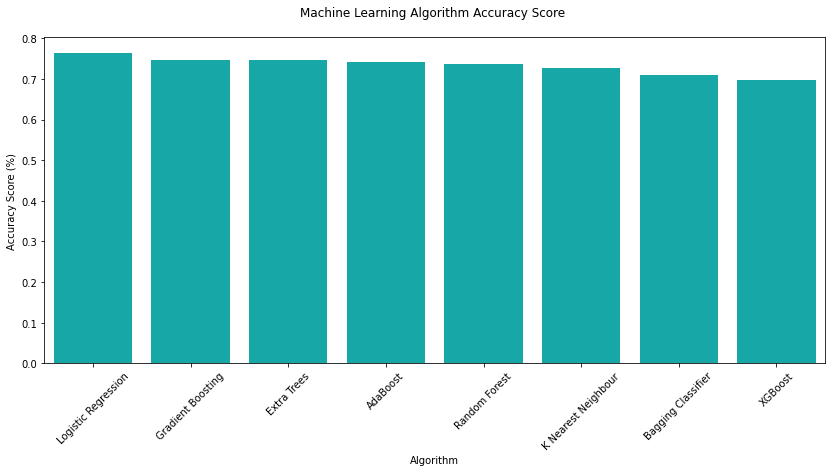

In [27]:
# Plot dos resultados
plt.figure(figsize=(14,6))
sns.barplot(x='Model', y = 'Score', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score (%)')
plt.xticks(rotation = 45);
# _ = plt.xlim(0.80, 1.0)

In [28]:
# Função para novo gráfico
def importance_plotting(data, x, y, palette, title):
    sns.set(style="whitegrid")
    ft = sns.PairGrid(data, y_vars=y, x_vars=x, size=6, aspect=2)
    ft.map(sns.stripplot, orient='h', palette=palette, edgecolor="black", size=15)
    
    for ax, title in zip(ft.axes.flat, titles):
    # Um título diferente para cada eixo
        ax.set(title=title)
    # Grid horizontal
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    plt.show()

In [29]:
# Colocando a importância das features no dataframe
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

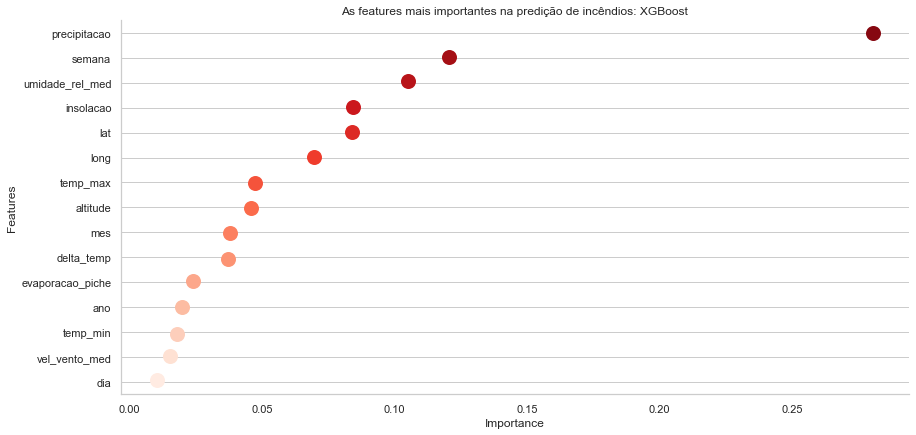

In [30]:
# Criação do título do gráfico
titles = ['As features mais importantes na predição de incêndios: XGBoost']

# Plotando o gráfico
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

In [31]:
# Building feature importance into a DataFrame
fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

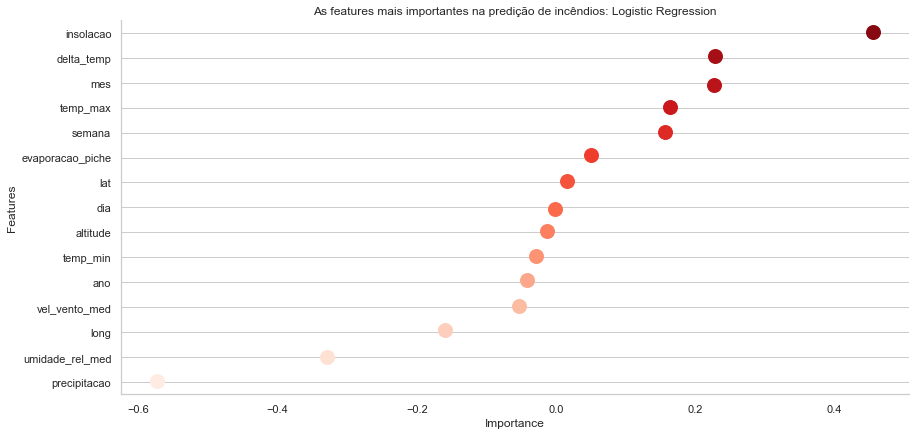

In [32]:
# Creating graph title
titles = ['As features mais importantes na predição de incêndios: Logistic Regression']

# Plotting graph
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

#### Round 2: Seleção de Features

In [33]:
# Getting feature importances for the 5 models where we can
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# Merging results into a single dataframe
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# Calculating average importance per feature
importances['Average'] = importances.mean(axis=1)

# Ranking top to bottom
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

# Display
importances

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
0,precipitacao,0.161740,0.280656,0.054675,0.032282,0.10,0.125870
1,semana,0.245156,0.120536,0.087215,0.086392,0.08,0.123860
2,insolacao,0.110784,0.084265,0.097888,0.100073,0.10,0.098602
3,umidade_rel_med,0.127600,0.105297,0.086433,0.094423,0.06,0.094751
4,lat,0.063059,0.084005,0.039154,0.046997,0.22,0.090643
5,temp_max,0.093667,0.047242,0.092692,0.084696,0.08,0.079659
6,delta_temp,0.052953,0.037068,0.088951,0.085552,0.06,0.064905
7,altitude,0.033579,0.045904,0.062523,0.061011,0.12,0.064603
8,long,0.065960,0.069735,0.039988,0.048659,0.08,0.060869
9,temp_min,0.006137,0.017830,0.075416,0.070630,0.08,0.050003


In [34]:
# Building feature importance into a DataFrame
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

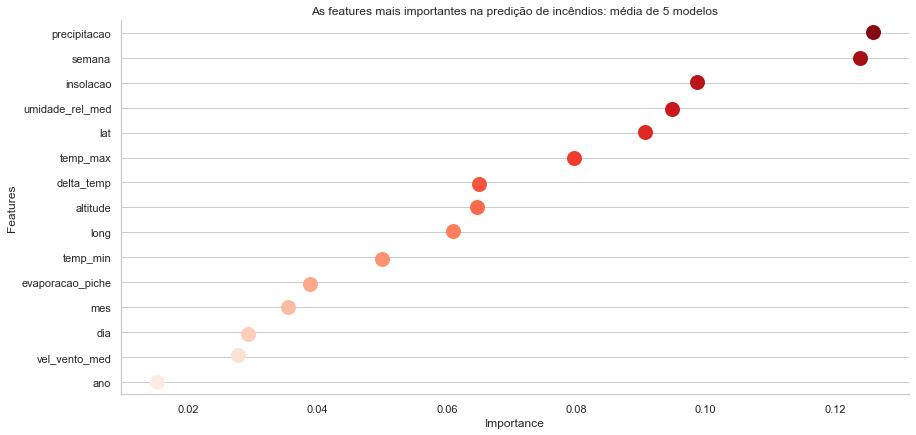

In [35]:
# Creating graph title
titles = ['As features mais importantes na predição de incêndios: média de 5 modelos']

# Plotting graph
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

*Rever features a serem dropadas na célula abaixo (features < 0.05)*

In [95]:
# Drop redundant features
train = train.drop(['ano'], axis=1)
test = test.drop(['ano'], axis=1)

# Re-build model variables
X_train = train
X_test = test

# Transform
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Retreino dos modelos

In [96]:
# Initiate models
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
# gpc = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

# Lists
models = [ran, knn, log, xgb, gbc, ext, ada, bag]         
scores_v2 = []

# Fit & cross validate
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 5)
    scores_v2.append(acc.mean())
    print("{} OK!".format(str(mod)))

RandomForestClassifier(random_state=1) OK!
KNeighborsClassifier() OK!
LogisticRegression() OK!
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) OK!
GradientBoostingClassifier(random_state=1) OK!
ExtraTreesClassifier(random_state=1) OK!
AdaBoostClassifier(random_state=1) OK!
BaggingClassifier(random_state=1) OK!


In [97]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'Extra Trees', 'AdaBoost', 'Bagging Classifier'],
    'Original Score': scores,
    'Score with feature selection': scores_v2})

result_df = results.sort_values(by='Score with feature selection', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection
0,Logistic Regression,0.764004,0.763992
1,Gradient Boosting,0.746623,0.744284
2,AdaBoost,0.740987,0.740987
3,Extra Trees,0.746075,0.739088
4,Random Forest,0.737142,0.735414
5,K Nearest Neighbour,0.725985,0.725790
6,Bagging Classifier,0.709573,0.702241
7,XGBoost,0.697947,0.699151


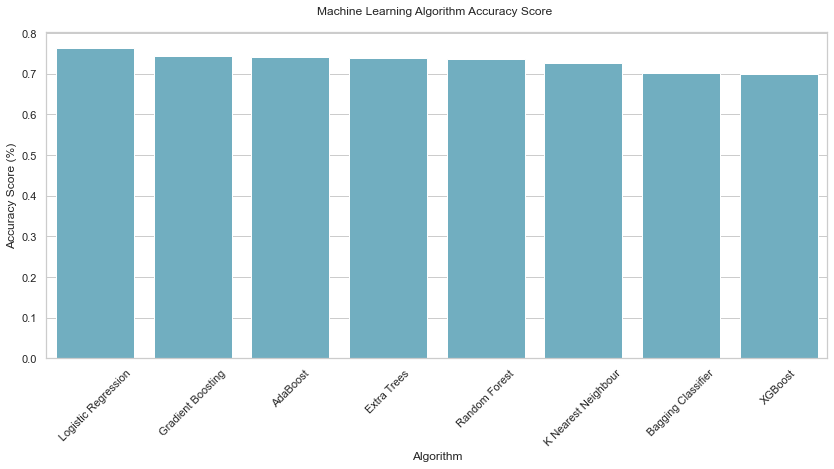

In [98]:
# Plot results
plt.figure(figsize=(14,6))
sns.barplot(x='Model', y = 'Score with feature selection', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score (%)')
plt.xticks(rotation = 45);

#### Round 3: Ajuste de hiperparâmetros do modelo

##### Gradient Boosting Classifier

In [51]:
# Parameter's to search
learning_rate = [0.0001, 0.001, 0.01, 0.1]
n_estimators = [100, 250, 750, 1000, 1500]

# Setting up parameter grid
hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

# Run GridSearch CV
gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=10, cv=5, scoring = "accuracy", n_jobs = 3)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 67.3min
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed: 266.1min finished


0.7730759620098351
GradientBoostingClassifier(learning_rate=0.01, n_estimators=250)


##### Logistic Regression

In [30]:
# Parameter's to search
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

# Setting up parameter grid
hyperparams = {'penalty': penalty, 'C': C}

# Run GridSearch CV
gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=10, cv=5, scoring = "accuracy", n_jobs = 3)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    2.4s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    4.2s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    5.6s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    6.5s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    8.2s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:   10.3s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   13.4s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:   15.9s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   18.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   20.9s finished


0.7640039672377565
LogisticRegression()


##### XGBoost

In [53]:
# Parameter's to search
learning_rate = [0.0001, 0.001, 0.01, 0.1]
n_estimators = [10, 25, 50, 100, 250, 500, 1000]

# Setting up parameter grid
hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

# Run GridSearch CV
gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, 
                verbose=10, cv=5, scoring = "accuracy", n_jobs = 3)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    8.4s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   14.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   25.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:   58.7s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  3.0min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  7.2min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  7.8min
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:  9.3min
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed: 14.4min
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed: 16.6min
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed: 18.6min
[Parallel(n_jobs=3)]: Done 107 tasks      | elapsed: 24.5min
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed: 26.1min
[Parallel(n_jobs=3)]: Done 140 out of 140 | elapsed: 33.6min finished


0.7699381824934779
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [54]:
max_depth = [3, 4, 6, 8, 10]
min_child_weight = [1, 2, 4, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10), param_grid = hyperparams, 
                verbose=10, cv=5, scoring = "accuracy", n_jobs = 3)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    3.4s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.9s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    9.2s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   12.3s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   16.5s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   22.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:   27.8s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   36.7s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:   47.3s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:  1.0min
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  1.2min finished


0.7558814596568673
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [55]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3, 
                                          min_child_weight=1), param_grid = hyperparams, 
                verbose=10, cv=5, scoring = "accuracy", n_jobs = 3)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    4.1s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.4s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    9.1s
[Parallel(n_jobs=3)]: Done  23 out of  25 | elapsed:   10.2s remaining:    0.8s
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:   10.8s finished


0.754002790582477
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [56]:
subsample = [0.6,0.7, 0.8, 0.9, 1]
colsample_bytree = [0.6, 0.7, 0.8, 0.9,  1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3, 
                                          min_child_weight=1, gamma=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs = 3)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   16.8s
[Parallel(n_jobs=3)]: Done 125 out of 125 | elapsed:   49.9s finished


0.7640556579079324
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [57]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3, 
                                          min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.9),
                                         param_grid = hyperparams, verbose=10, cv=5, scoring = "accuracy", n_jobs = 3)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    3.6s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    9.0s
[Parallel(n_jobs=3)]: Done  23 out of  25 | elapsed:   10.4s remaining:    0.8s
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:   11.4s finished


0.7615613015862233
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


##### Adaboost

In [58]:
# Parameter's to search
n_estimators = [10, 50, 75, 100, 150, 200]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 2]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

# Run GridSearch CV
gd=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=10, cv=5, scoring = "accuracy", n_jobs = 3)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    3.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   21.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   56.7s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  2.1min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  4.0min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  5.2min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  6.3min
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:  8.7min
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed: 10.4min
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed: 12.1min
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed: 14.8min
[Parallel(n_jobs=3)]: Done 107 tasks      | elapsed: 16.7min
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed: 19.7min
[Parallel(n_jobs=3)]: Done 139 tasks      | elapsed: 22.0min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed: 25.1min
[Parallel(

0.7729964602979188
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


##### K Nearest Neighbours

In [27]:
# Parameter's to search
n_neighbors = [1, 2, 4, 6, 10, 14]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 4, 10, 20, 30]

# Setting up parameter grid
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

# Run GridSearch CV
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=10, cv=5, scoring = "accuracy", n_jobs = 5)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  5.1min
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed: 10.4min
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed: 17.2min
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed: 29.8min
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 47.9min
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed: 57.6min
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed: 87.7min
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed: 103.0min
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed: 113.1min
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed: 130.8min
[Parallel(n_jobs=5)]: Done 103 tasks      | elapsed: 151.3min
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed: 175.1min
[Parallel(n_jobs=5)]: Done 135 tasks      | elapsed: 191.6min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed: 216.1min
[Parallel(n_jobs=5)]: Done 171 tasks      | elapsed: 244.4min
[P

0.7530296726314114
KNeighborsClassifier(leaf_size=1, n_neighbors=14)


##### Random Forest

In [26]:
# Parameter's to search
n_estimators = [10, 25, 50, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 6, 10]
min_samples_leaf = [2, 6, 10]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=10, cv=5, scoring = "accuracy", n_jobs = 5)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    5.8s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   11.5s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   23.7s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   31.7s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   42.5s
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:   51.5s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 103 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:  2.0min
[Parallel(n_jobs=5)]: Done 135 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Done 171 tasks      | elapsed:  2.7min
[Parallel(

0.7721108724559355
RandomForestClassifier(max_features=1, min_samples_leaf=10, n_estimators=50)


##### Extra Trees

In [27]:
# Parameter's to search
n_estimators = [10, 25, 50, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 6, 10]
min_samples_leaf = [2, 6, 10]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
gd=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=10, cv=5, scoring = "accuracy", n_jobs = 5)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    5.7s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   13.1s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   18.1s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   24.7s
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:   30.1s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   37.6s
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:   43.0s
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:   51.7s
[Parallel(n_jobs=5)]: Done 103 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 135 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 171 tasks      | elapsed:  1.7min
[Parallel(

0.7747045392436418
ExtraTreesClassifier(max_features=3, min_samples_leaf=10, min_samples_split=10,
                     n_estimators=50)


##### Bagging Classifier

In [28]:
# Parameter's to search
n_estimators = [10, 20, 50, 100]
max_samples = [1, 7, 10, 20, 30]
max_features = [1, 3, 5, 7]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

# Run GridSearch CV
gd=GridSearchCV(estimator = BaggingClassifier(), param_grid = hyperparams, 
                verbose=10, cv=5, scoring = "accuracy", n_jobs = 5)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    5.0s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   11.0s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   15.2s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   21.7s
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:   25.8s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   32.2s
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:   36.8s
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:   43.9s
[Parallel(n_jobs=5)]: Done 103 tasks      | elapsed:   54.0s
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 135 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 171 tasks      | elapsed:  1.7min
[Parallel(

0.7657635257689444
BaggingClassifier(max_features=7, max_samples=20, n_estimators=100)


##### Retreino do modelo

In [99]:
# Initiate tuned models
ran = RandomForestClassifier(n_estimators=50,
                             max_depth=3, 
                             max_features=1,
                             min_samples_leaf=10, 
                             min_samples_split=8,  
                             random_state=1)

knn = KNeighborsClassifier(algorithm='auto', 
                           leaf_size=1, 
                           n_neighbors=14, 
                           weights='uniform')

log = LogisticRegression()

xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

gbc = GradientBoostingClassifier(learning_rate=0.01, 
                                 n_estimators=250,
                                random_state = 1)


ext = ExtraTreesClassifier(max_depth=None, 
                           max_features=3,
                           min_samples_leaf=10, 
                           min_samples_split=10,
                           n_estimators=50,
                           random_state=1)

ada = AdaBoostClassifier(learning_rate=0.1, 
                         n_estimators=100,
                         random_state=1)


bag = BaggingClassifier(max_features=7,
                        max_samples=20, 
                        n_estimators=100,
                        random_state=1)

# Lists
models = [ran, knn, log, xgb, gbc, ext, ada, bag]         
scores_v3 = []

# Fit & cross-validate
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_v3.append(acc.mean())
    print("{} OK!".format(str(mod)))

RandomForestClassifier(max_depth=3, max_features=1, min_samples_leaf=10,
                       min_samples_split=8, n_estimators=50, random_state=1) OK!
KNeighborsClassifier(leaf_size=1, n_neighbors=14) OK!
LogisticRegression() OK!
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None) OK!
GradientBoostingClassifier(learning_rate=0.01, n_estimators=250, random_state=1) OK!
ExtraTreesClassifier(max_features=3, min_samples_leaf=10, min_samples_split=10,
              

In [101]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'Extra Trees', 'AdaBoost', 'Bagging Classifier'],
    'Original Score': scores,
    'Score with feature selection': scores_v2,
    'Score with tuned parameters': scores_v3})

result_df = results.sort_values(by='Score with tuned parameters', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection,Score with tuned parameters
0,AdaBoost,0.740987,0.740987,0.772035
1,Gradient Boosting,0.746623,0.744284,0.769164
2,Logistic Regression,0.764004,0.763992,0.762097
3,Bagging Classifier,0.709573,0.702241,0.760243
4,XGBoost,0.697947,0.699151,0.752045
5,Random Forest,0.737142,0.735414,0.749920
6,Extra Trees,0.746075,0.739088,0.735712
7,K Nearest Neighbour,0.725985,0.725790,0.717993


Text(0, 0.5, 'Accuracy Score (%)')

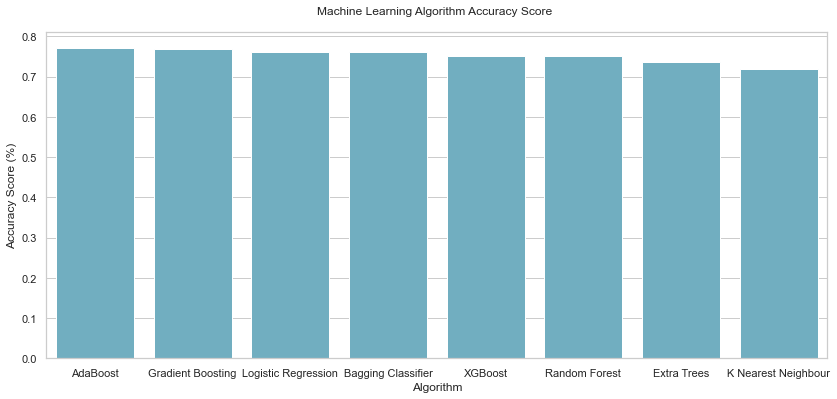

In [102]:
# Plot results
plt.figure(figsize=(14,6))
sns.barplot(x='Model', y = 'Score with tuned parameters', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score (%)')

#### Round 4: Voting Classifier

In [103]:
#Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv = 10)
grid_hard.fit(X_train, y_train)

#print("Hard voting on train set score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))

Hard voting on test set score mean: 76.70


In [104]:
grid_soft = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv = 10)
grid_soft.fit(X_train, y_train)

#print("Soft voting on train set score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))

Soft voting on test set score mean: 76.12


# 7. Modelo Final - Predição e Submissão

In [105]:
# Predições finais
predictions = grid_soft.predict(X_test)

submission = pd.concat([pd.DataFrame(fireId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["id", "fires"]
submission.to_csv('./submissions/fires_submission.csv', header = True, index = False)